# Deliery Time Dataset

- Predict Delivery time using sorting time

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcPramas['figure.dpi'] = 250

In [2]:
df = pd.read_csv(r"E:\ExcelR\Data Science\Assignment\Simple Linear Regression\delivery_time.csv")

In [5]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [19]:
df.rename(columns={"Delivery Time":"Delivery_Time",
                  "Sorting Time": "Sorting_Time"}, inplace=True)

In [20]:
df.isna().sum()

Delivery_Time         0
Sorting_Time          0
log_delivery_time     0
log_sorting_time      0
sqrt_delivery_time    0
sqrt_sorting_time     0
dtype: int64

In [21]:
df.duplicated().sum()

0

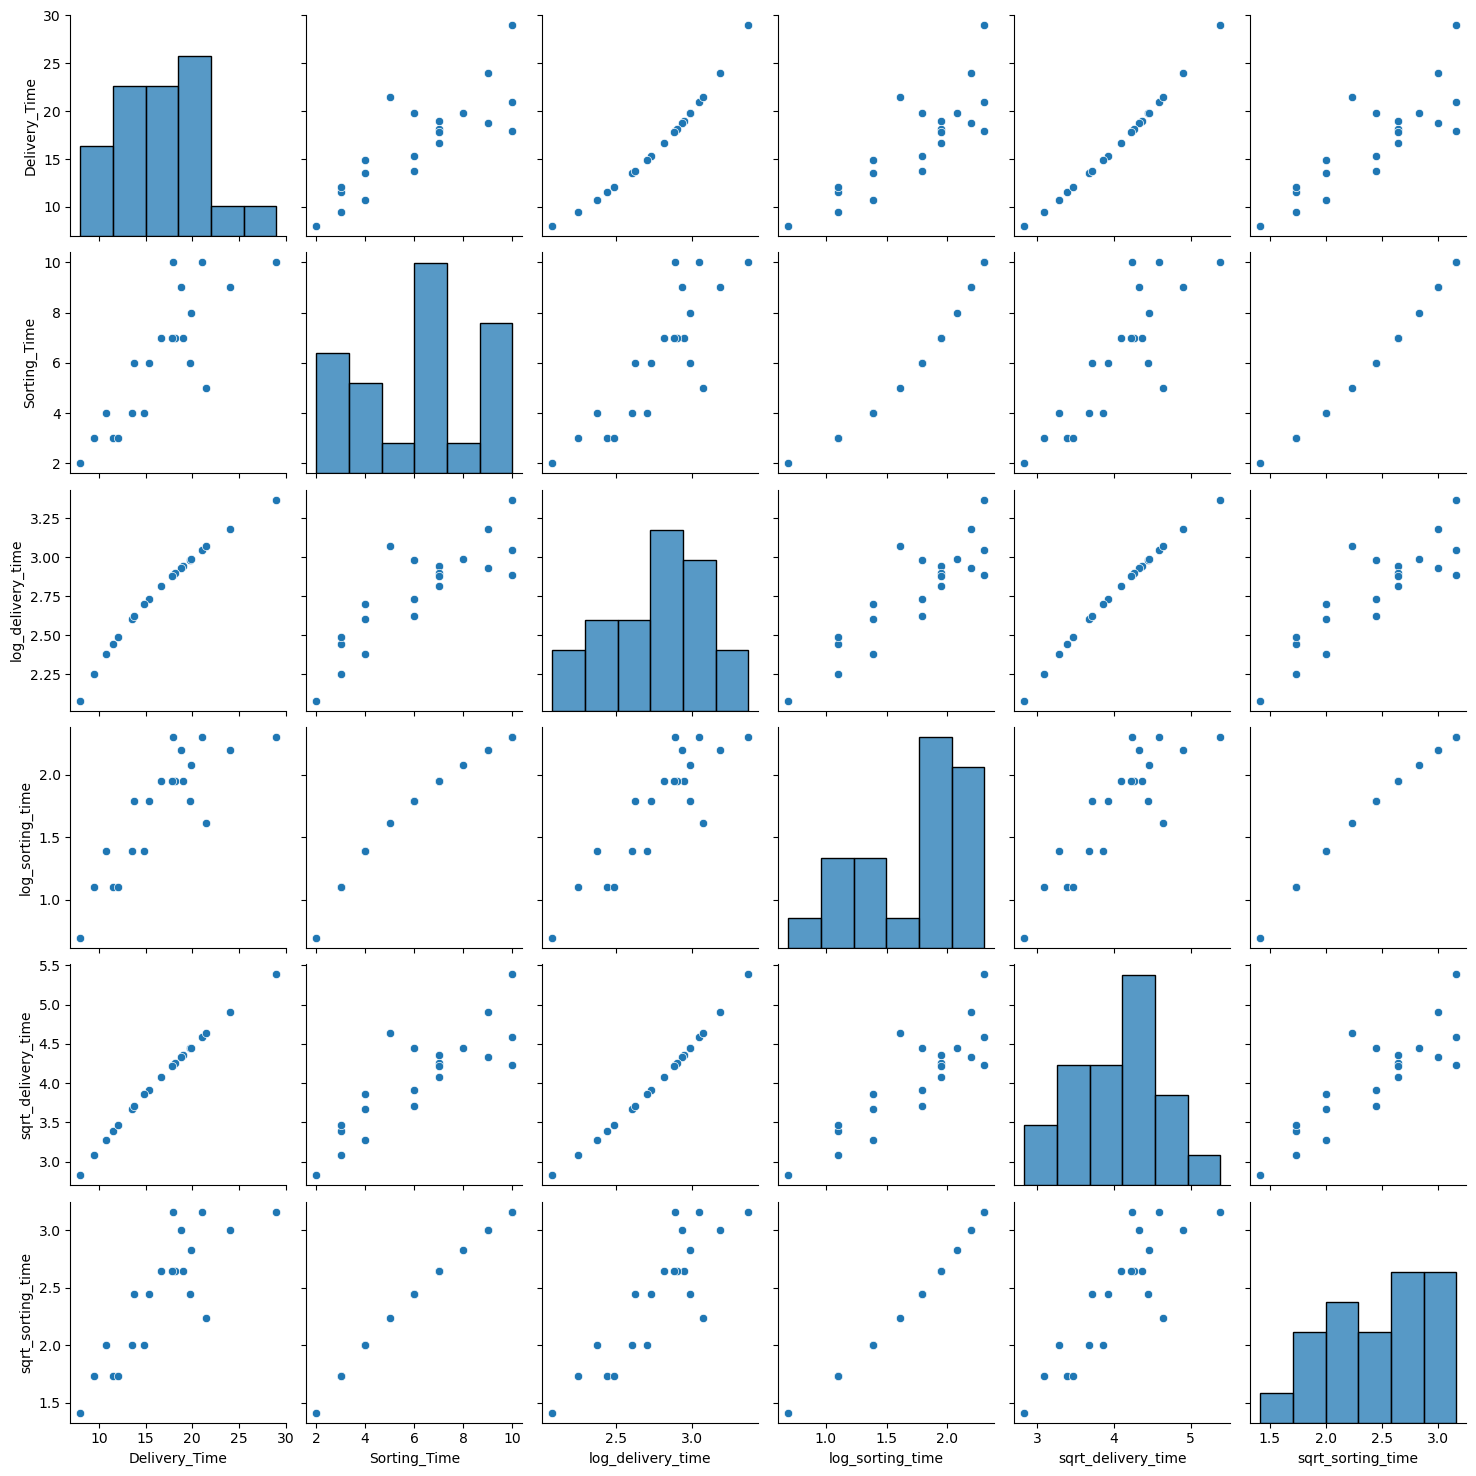

In [22]:
sns.pairplot(df)

<Axes: xlabel='Sorting_Time', ylabel='Density'>

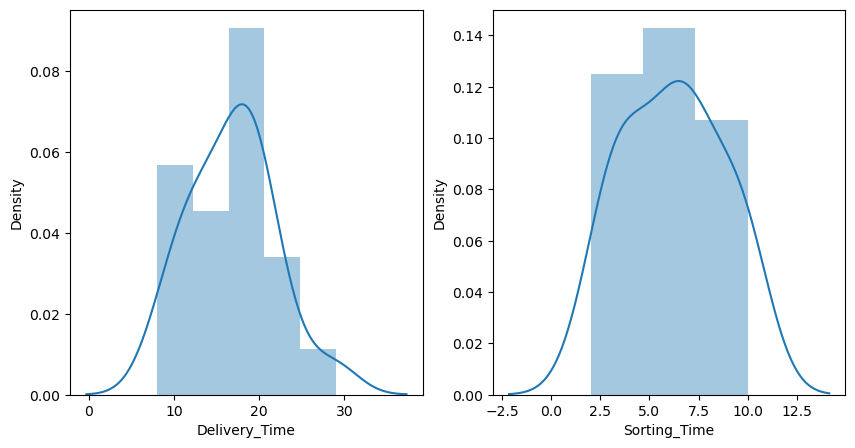

In [23]:
plt.subplot(1,2,1)
sns.distplot(df['Delivery_Time'])

plt.subplot(1,2,2)
sns.distplot(df['Sorting_Time'])

<Axes: >

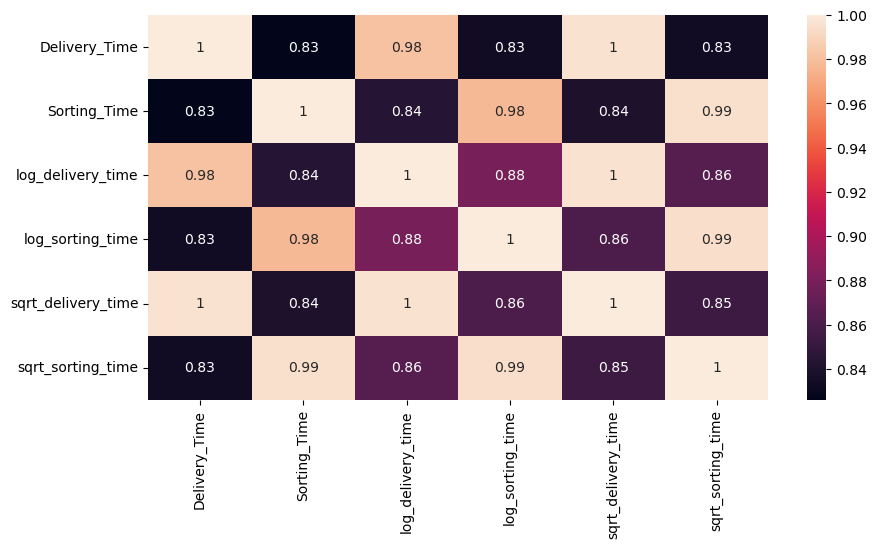

In [24]:
sns.heatmap(df.corr(), annot = True)

# Transformations

<Axes: xlabel='log_sorting_time', ylabel='Density'>

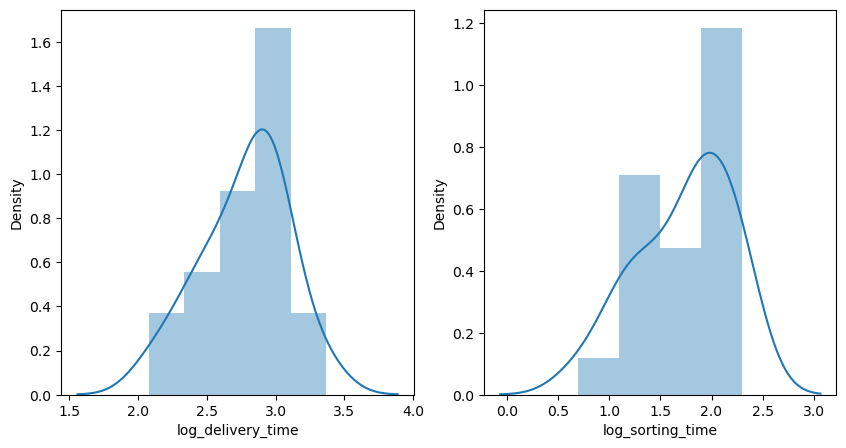

In [25]:
# Log Transformation

df['log_delivery_time'] = np.log(df['Delivery_Time'])
df['log_sorting_time'] = np.log(df['Sorting_Time'])

plt.subplot(1,2,1)
sns.distplot(df['log_delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['log_sorting_time'])

<Axes: xlabel='sqrt_sorting_time', ylabel='Density'>

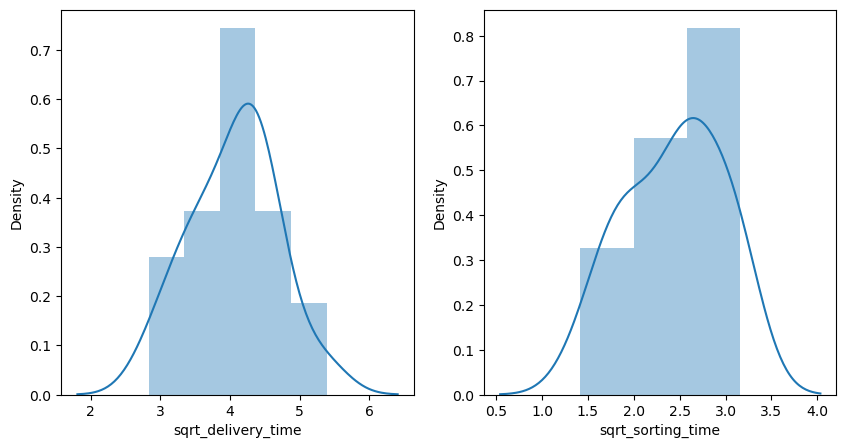

In [31]:
# sqrt tranformation

df['sqrt_delivery_time'] = np.sqrt(df['Delivery_Time'])
df['sqrt_sorting_time'] = np.sqrt(df['Sorting_Time'])

plt.subplot(1,2,1)
sns.distplot(df['sqrt_delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_sorting_time'])

# Model Building

In [17]:
import statsmodels.formula.api as smf

### On Originial Data

In [28]:
model = smf.ols('Delivery_Time~Sorting_Time', data=df).fit()

In [29]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [30]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

### On Log Transformed Data

In [32]:
log_model = smf.ols('log_delivery_time~log_sorting_time',data=df).fit()

In [33]:
log_model.params

Intercept           1.741987
log_sorting_time    0.597522
dtype: float64

In [34]:
log_model.rsquared, log_model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

### On SQRT Transformed Data

In [36]:
sqrt_model = smf.ols('sqrt_delivery_time~sqrt_sorting_time',data=df).fit()

In [37]:
sqrt_model.params

Intercept            1.613479
sqrt_sorting_time    1.002217
dtype: float64

In [38]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

## Simple Linear Regression using sklearn

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
x = np.array(df['Sorting_Time']).reshape((-1,1))
y = df['Delivery_Time']

In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [54]:
linear_model = LinearRegression()
linear_model.fit(xtrain,ytrain)

LinearRegression()

In [55]:
linear_model.coef_, linear_model.intercept_

(array([1.52971053]), 7.176184210526316)

In [56]:
ypred = linear_model.predict(xtest)
ypred

array([13.29502632, 19.41386842, 20.94357895, 10.23560526, 17.88415789])

In [57]:
mse = mean_squared_error(ytest,ypred)
mse

3.4151904541551223

In [58]:
r2_score(ytest,ypred)

0.881193344590806

- From the above all the r2 values we can conclude that sklearn is the best model that can be used for the problem

# Salary Dataset

- Prediction model for salary hike

In [59]:
dt = pd.read_csv(r"E:\ExcelR\Data Science\Assignment\Simple Linear Regression\Salary_Data.csv")

In [60]:
dt.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [62]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [63]:
dt.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [64]:
dt.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [65]:
dt.duplicated().sum()

0

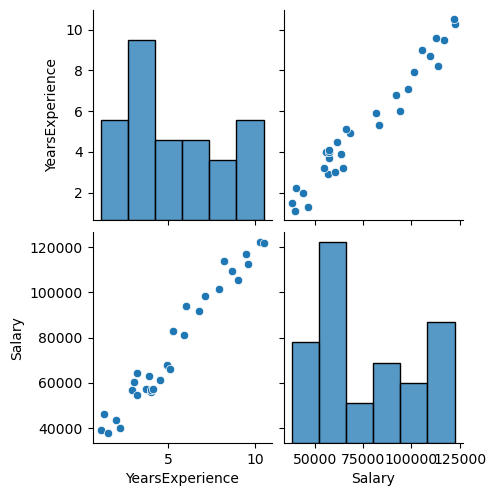

In [66]:
sns.pairplot(data=dt)

<Axes: >

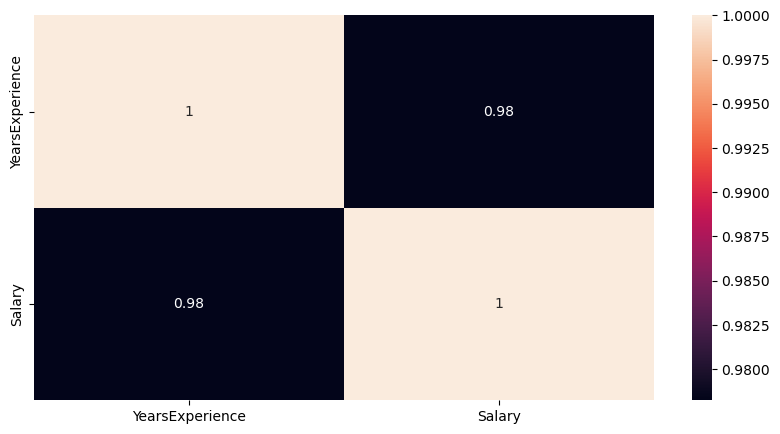

In [67]:
sns.heatmap(dt.corr(), annot = True)

# Transformations

<Axes: xlabel='log_YearsExperience', ylabel='Density'>

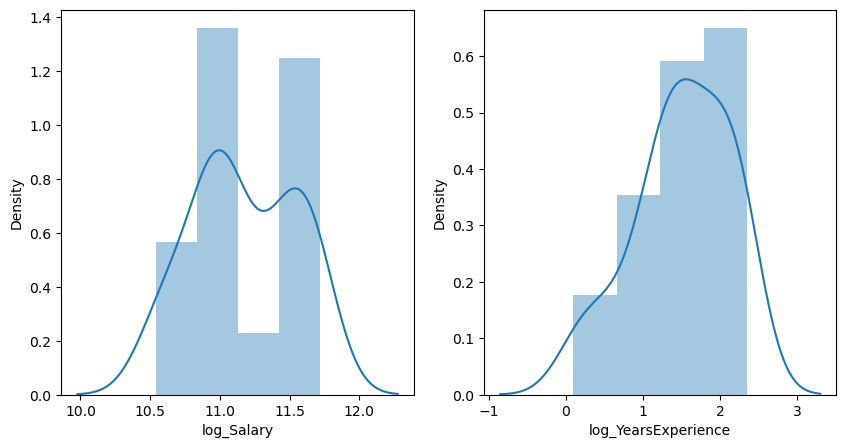

In [70]:
# Log Transformation

dt["log_Salary"] = np.log(dt["Salary"])
dt["log_YearsExperience"] = np.log(dt["YearsExperience"])

plt.subplot(1,2,1)
sns.distplot(dt["log_Salary"])

plt.subplot(1,2,2)
sns.distplot(dt["log_YearsExperience"])

<Axes: xlabel='sqrt_YearsExperience', ylabel='Density'>

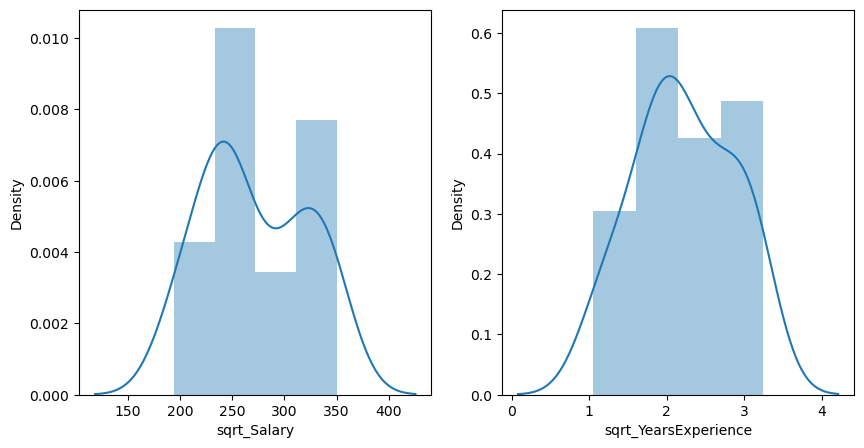

In [71]:
# sqrt Transformation

dt["sqrt_Salary"] = np.sqrt(dt["Salary"])
dt["sqrt_YearsExperience"] = np.sqrt(dt["YearsExperience"])

plt.subplot(1,2,1)
sns.distplot(dt["sqrt_Salary"])

plt.subplot(1,2,2)
sns.distplot(dt["sqrt_YearsExperience"])

# Model Building

### Original Data

In [73]:
# Using Stats model

model = smf.ols("Salary~YearsExperience",data = dt).fit()

In [74]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [75]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

### On Log Transformed Data

In [76]:
log_model = smf.ols("log_Salary~log_YearsExperience",data = dt).fit()

In [77]:
log_model.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [78]:
log_model.rsquared, log_model.rsquared_adj

(0.905215072581715, 0.9018298966024905)

### On SQRT Transformed Data

In [79]:
sqrt_model = smf.ols("sqrt_Salary~sqrt_YearsExperience",data = dt).fit()

In [80]:
sqrt_model.params

Intercept               103.568031
sqrt_YearsExperience     75.626932
dtype: float64

In [81]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.9419490138976826, 0.9398757643940284)

### Using SKLEARN

In [83]:
x = np.array(dt['YearsExperience']).reshape((-1, 1))
y = dt['Salary']

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=101)

In [87]:
lr_model = LinearRegression()
lr_model.fit(xtrain, ytrain)

LinearRegression()

In [88]:
lr_model.coef_, lr_model.intercept_

(array([1.52971053]), 7.176184210526316)

In [89]:
ypred = lr_model.predict(xtest)
ypred

array([13.29502632, 19.41386842, 20.94357895, 10.23560526, 17.88415789])

In [90]:
mse = mean_squared_error(ytest,ypred)
mse

3.4151904541551223

In [91]:
r2_score(ytest, ypred)

0.881193344590806

- We can conclude that here sklearn is the best model that can be used